- **Name:** Smruti Sonekar
- **Branch:** CSE DS
- **UID:** 2021700064
- **EXPNO:** 7th


In [574]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [575]:
f1=pd.read_csv("./files/fraud_oracle.csv")
df1=pd.DataFrame(f1)
df1.sample(3)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
921,Jun,2,Thursday,Honda,Urban,Friday,Jun,2,Male,Married,...,6 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1994,Liability
7841,Nov,5,Monday,Chevrolet,Urban,Monday,Nov,5,Male,Single,...,7 years,36 to 40,No,No,External,none,no change,1 vehicle,1995,Liability
15244,Jun,2,Friday,Honda,Urban,Tuesday,Jun,3,Male,Single,...,7 years,31 to 35,No,No,External,1 to 2,no change,1 vehicle,1996,Collision


In [576]:
df1.shape

(15420, 33)

In [577]:
df1.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

## Data Cleaning:

1. **Handling Missing Values:**
   - Identify and handle missing data appropriately.

2. **Removing Unnecessary Columns:**
   - Eliminate columns that do not contribute meaningful information to the analysis or modeling task.

3. **Converting Data Types:**
   - Ensure that variables have appropriate data types (e.g., numeric variables should be represented as floats or integers, categorical variables should be represented as strings or categories).

4. **Standardization:**
   - Standardize the data if needed for certain analysis or modeling techniques.

5. **Removing Irrelevant Columns:**
   -Removing columns which donot have any meaning



1. **Here we have taken necesary columns in new dataframe**

In [578]:
new_df=df1[['WeekOfMonth','Make','BasePolicy','Year','DriverRating','VehicleCategory','AgeOfVehicle','FraudFound_P','PolicyType','Deductible','Fault','Age','AccidentArea','RepNumber']]

In [579]:
new_df.sample(5)

,WeekOfMonth,Make,BasePolicy,Year,DriverRating,VehicleCategory,AgeOfVehicle,FraudFound_P,PolicyType,Deductible,Fault,Age,AccidentArea,RepNumber
1013,1,Toyota,Liability,1994,3,Sport,more than 7,0,Sedan - Liability,400,Third Party,51,Urban,6
1075,4,Toyota,All Perils,1994,4,Sedan,more than 7,0,Sedan - All Perils,400,Policy Holder,65,Urban,2
5071,5,Toyota,Collision,1994,2,Sedan,7 years,0,Sedan - Collision,400,Third Party,41,Urban,4
3419,3,Honda,All Perils,1994,3,Sedan,6 years,0,Sedan - All Perils,400,Policy Holder,28,Rural,11
1683,2,Accura,Collision,1994,2,Sedan,7 years,0,Sedan - Collision,500,Policy Holder,42,Urban,15


In [580]:
new_df.shape[1]

14

In [581]:
import random

Here as we have complete dataset which did not have any null values , so for handling missing data we have to add null values , so here i am adding null values randomly 

In [582]:
nr=15420
nc=5
num=200
for _ in range(num):
    row_idx=random.randint(0,nr-1)
    col_idx=random.randint(0,nc-1)
    new_df.iat[row_idx,col_idx]=None
   

In [583]:
for _ in range(55):
    row_idx=random.randint(0,nr-1)
    new_df.loc[row_idx,'Age']=None
    new_df.loc[row_idx,'Deductible']=None

In [584]:
new_df.isnull().sum()

WeekOfMonth        45
Make               39
BasePolicy         36
Year               45
DriverRating       35
VehicleCategory     0
AgeOfVehicle        0
FraudFound_P        0
PolicyType          0
Deductible         55
Fault               0
Age                55
AccidentArea        0
RepNumber           0
dtype: int64

In [585]:
new_df.isnull().mean()*100

WeekOfMonth        0.291829
Make               0.252918
BasePolicy         0.233463
Year               0.291829
DriverRating       0.226978
VehicleCategory    0.000000
AgeOfVehicle       0.000000
FraudFound_P       0.000000
PolicyType         0.000000
Deductible         0.356680
Fault              0.000000
Age                0.356680
AccidentArea       0.000000
RepNumber          0.000000
dtype: float64

In [586]:
len(new_df["BasePolicy"].unique())

4

In [587]:
len(new_df["Make"].unique())

20

**Now we will check datatype of the columns and convert all categorical data to string or category and numerical column into int ,float**

In [588]:
m=new_df.dtypes
m

WeekOfMonth        float64
Make                object
BasePolicy          object
Year               float64
DriverRating       float64
VehicleCategory     object
AgeOfVehicle        object
FraudFound_P         int64
PolicyType          object
Deductible         float64
Fault               object
Age                float64
AccidentArea        object
RepNumber            int64
dtype: object

In [589]:

new_df["Make"]=new_df["Make"].astype('category')
new_df["Fault"]=new_df["Fault"].astype("category")


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15560\984947301.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Make"]=new_df["Make"].astype('category')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15560\984947301.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Fault"]=new_df["Fault"].astype("category")


In [590]:
new_df.dtypes

WeekOfMonth         float64
Make               category
BasePolicy           object
Year                float64
DriverRating        float64
VehicleCategory      object
AgeOfVehicle         object
FraudFound_P          int64
PolicyType           object
Deductible          float64
Fault              category
Age                 float64
AccidentArea         object
RepNumber             int64
dtype: object

**Now we will handle missing data**

In [591]:
new_df.describe()

,WeekOfMonth,Year,DriverRating,FraudFound_P,Deductible,Age,RepNumber
count,15375.000000,15375.000000,15385.000000,15420.000000,15365.000000,15365.000000,15420.000000
mean,2.787707,1994.866537,2.487943,0.059857,407.731858,39.864562,8.483268
std,1.287860,0.803358,1.119487,0.237230,44.027174,13.487618,4.599948
min,1.000000,1994.000000,1.000000,0.000000,300.000000,0.000000,1.000000
25%,2.000000,1994.000000,1.000000,0.000000,400.000000,31.000000,5.000000
50%,3.000000,1995.000000,2.000000,0.000000,400.000000,38.000000,8.000000
75%,4.000000,1996.000000,3.000000,0.000000,400.000000,48.000000,12.000000
max,5.000000,1996.000000,4.000000,1.000000,700.000000,80.000000,16.000000


The SimpleImputer class provides a simple strategy to handle missing values. It can be used to replace missing values with a specific constant or with statistics like the mean, median, or most frequent value of the respective columns.

In [592]:
new_df.isnull().sum()

WeekOfMonth        45
Make               39
BasePolicy         36
Year               45
DriverRating       35
VehicleCategory     0
AgeOfVehicle        0
FraudFound_P        0
PolicyType          0
Deductible         55
Fault               0
Age                55
AccidentArea        0
RepNumber           0
dtype: int64

There is one mean , median imputation which works on numerical data , so here we will fill driverrating with its mean, deductible by its median and then plot graph

In [593]:
n1=new_df[['WeekOfMonth','Year','DriverRating','Age','RepNumber','Deductible','FraudFound_P']]

In [594]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [595]:
x=n1.drop(columns="FraudFound_P")
y=n1["FraudFound_P"]

In [596]:
x.shape

(15420, 6)

In [597]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [598]:
x_train.shape,x_test.shape

((12336, 6), (3084, 6))

In [599]:
x_train.isnull().mean()

WeekOfMonth     0.003243
Year            0.002999
DriverRating    0.002108
Age             0.003161
RepNumber       0.000000
Deductible      0.003161
dtype: float64

In [600]:
mean_age=x_train["Age"].mean()
median_age=x_train["Age"].median()

mean_ded=x_train["Deductible"].mean()
median_ded=x_train["Deductible"].median()


In [601]:
x_train["Age_mean"]=x_train["Age"].fillna(mean_age)
x_train["Age_median"]=x_train["Age"].fillna(median_age)

x_train["ded_mean"]=x_train["Deductible"].fillna(mean_ded)
x_train["ded_median"]=x_train["Deductible"].fillna(median_ded)


In [602]:
print('Original Age variable variance: ', x_train['Age'].var())
print('Age Variance after median imputation: ', x_train['Age_median'].var())
print('Age Variance after mean imputation: ', x_train['Age_mean'].var())

print('Original deductible variable variance: ', x_train['Deductible'].var())
print('deductible Variance after median imputation: ', x_train['ded_mean'].var())
print('deductible Variance after mean imputation: ', x_train['ded_median'].var())



Original Age variable variance:  181.2179758285619
Age Variance after median imputation:  180.65520157913247
Age Variance after mean imputation:  180.6450126297525
Original deductible variable variance:  1931.017102255926
deductible Variance after median imputation:  1924.9117380898958
deductible Variance after mean imputation:  1925.0978677295157


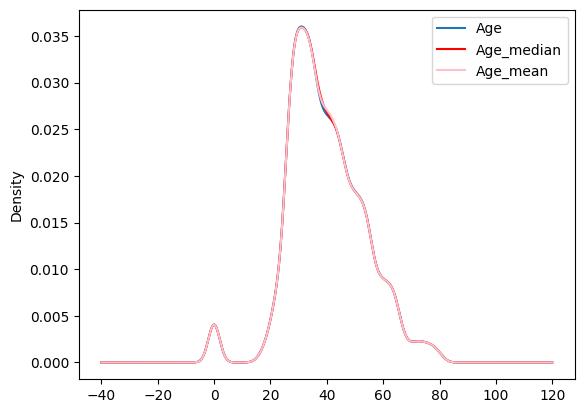

In [603]:
#plotting the graph for age columns
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
x_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
x_train['Age_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
x_train['Age_mean'].plot(kind='kde', ax=ax, color='pink')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

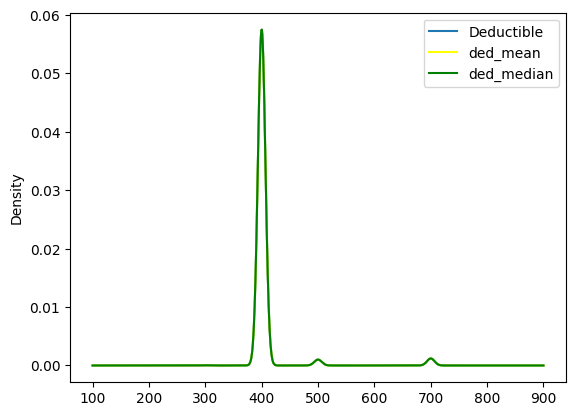

In [604]:
fig = plt.figure()
ax = fig.add_subplot(111)
#plotting for deductible column
x_train["Deductible"].plot(kind='kde',ax=ax)
x_train["ded_mean"].plot(kind='kde',ax=ax,color="yellow")
x_train["ded_median"].plot(kind='kde',ax=ax,color="green")
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [605]:
x_train.corr()

,WeekOfMonth,Year,DriverRating,Age,RepNumber,Deductible,Age_mean,Age_median,ded_mean,ded_median
WeekOfMonth,1.000000,-0.008761,-0.014664,-0.003243,0.008309,0.001749,-0.003238,-0.003280,0.001746,0.001690
Year,-0.008761,1.000000,-0.010862,0.029828,0.005003,-0.000599,0.029784,0.029793,-0.000599,-0.000586
DriverRating,-0.014664,-0.010862,1.000000,-0.000789,0.016025,0.012866,-0.000788,-0.000825,0.012846,0.012797
Age,-0.003243,0.029828,-0.000789,1.000000,-0.002407,0.069440,1.000000,1.000000,0.069440,0.069440
RepNumber,0.008309,0.005003,0.016025,-0.002407,1.000000,-0.000702,-0.002402,-0.002384,-0.000700,-0.000677
Deductible,0.001749,-0.000599,0.012866,0.069440,-0.000702,1.000000,0.069440,0.069440,1.000000,1.000000
Age_mean,-0.003238,0.029784,-0.000788,1.000000,-0.002402,0.069440,1.000000,0.999972,0.069440,0.069437
Age_median,-0.003280,0.029793,-0.000825,1.000000,-0.002384,0.069440,0.999972,1.000000,0.069438,0.069509
ded_mean,0.001746,-0.000599,0.012846,0.069440,-0.000700,1.000000,0.069440,0.069438,1.000000,0.999952
ded_median,0.001690,-0.000586,0.012797,0.069440,-0.000677,1.000000,0.069437,0.069509,0.999952,1.000000


<Axes: >

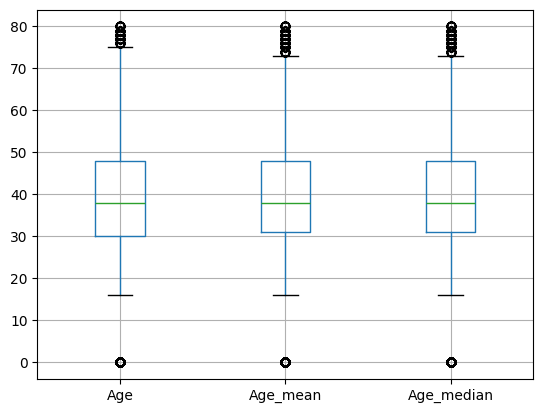

In [606]:
x_train[['Age','Age_mean','Age_median']].boxplot()

<Axes: >

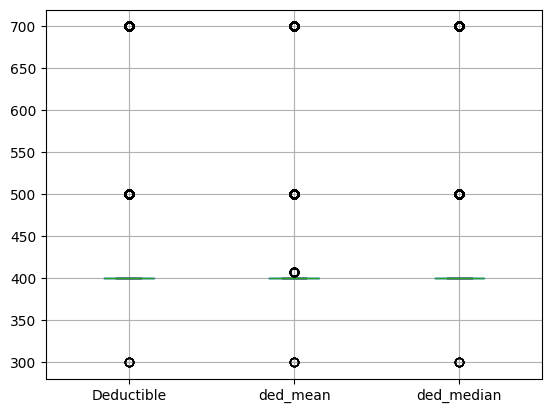

In [607]:
x_train[['Deductible','ded_mean','ded_median']].boxplot()

Now we will use simple imputer function which is used to fill categorical data we can fill categorical data with mode or the most frequent

In [608]:
new_df["Make"].isnull().sum()

39

In [609]:
new_df["BasePolicy"].isnull().sum()

36

<Axes: xlabel='Make'>

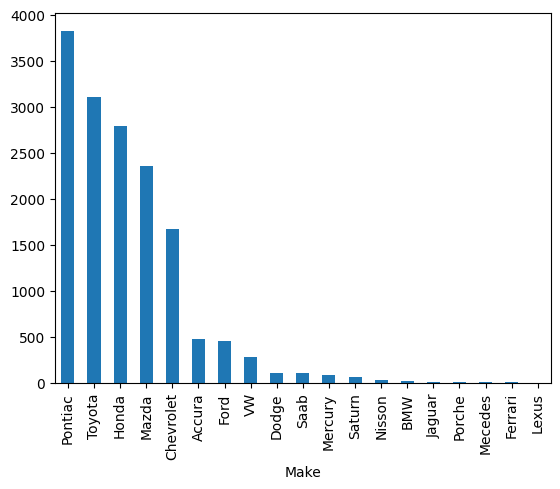

In [610]:
#we have two columns which are categorical and have null values,lets plot graph of both of them
new_df["Make"].value_counts().plot(kind='bar')

In [611]:
new_df["Make"].mode() #after getting mode value 

0    Pontiac
Name: Make, dtype: category
Categories (19, object): ['Accura', 'BMW', 'Chevrolet', 'Dodge', ..., 'Saab', 'Saturn', 'Toyota', 'VW']

Text(0.5, 1.0, 'Make col')

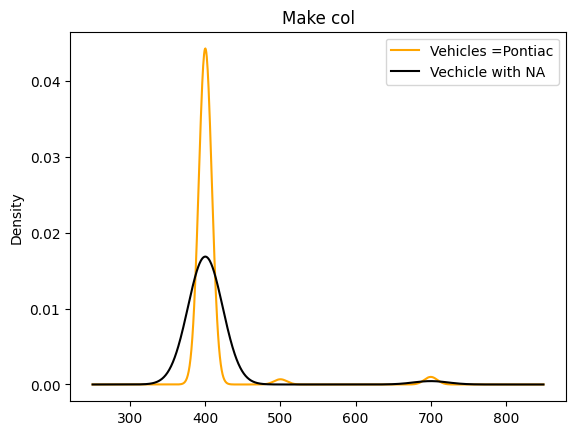

In [612]:
# plot density plot with respect to most frequent catogery of 'Make' Vs Deductible
fig = plt.figure()
ax = fig.add_subplot(111)

new_df[new_df["Make"]=="Pontiac"]["Deductible"].plot(kind='kde',ax=ax,color="orange")
new_df[new_df["Make"].isnull()]["Deductible"].plot(kind='kde',ax=ax,color="black")
lines, labels = ax.get_legend_handles_labels()
labels = ['Vehicles =Pontiac', 'Vechicle with NA']
ax.legend(lines, labels, loc='best')

plt.title("Make col")

In [613]:
temp=new_df[new_df["Make"]=="Pontiac"]["Deductible"]

In [614]:
new_df["Make"].fillna('Pontiac',inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15560\509067644.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Make"].fillna('Pontiac',inplace=True)


<Axes: xlabel='Make'>

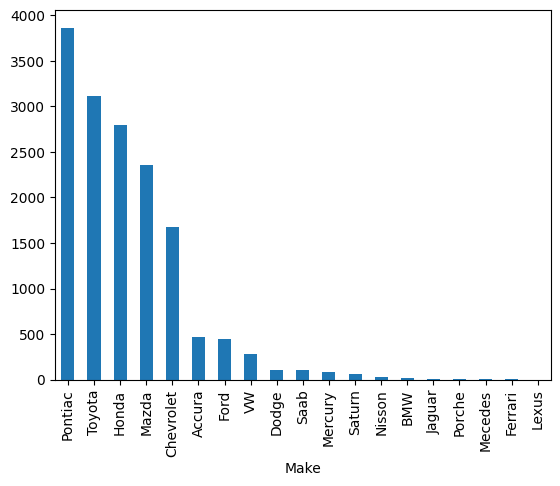

In [615]:
new_df["Make"].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'Make col')

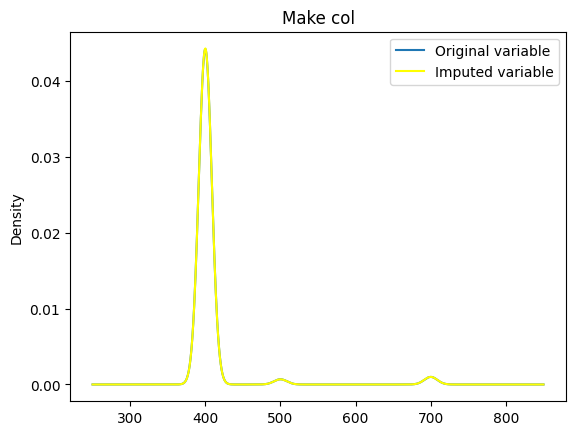

In [616]:
fig = plt.figure()
ax = fig.add_subplot(111)

# distribution of the variable before imputation
temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
new_df[new_df["Make"]=='Pontiac']['Deductible'].plot(kind='kde',ax=ax,color="yellow")


lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('Make col')

<Axes: xlabel='BasePolicy'>

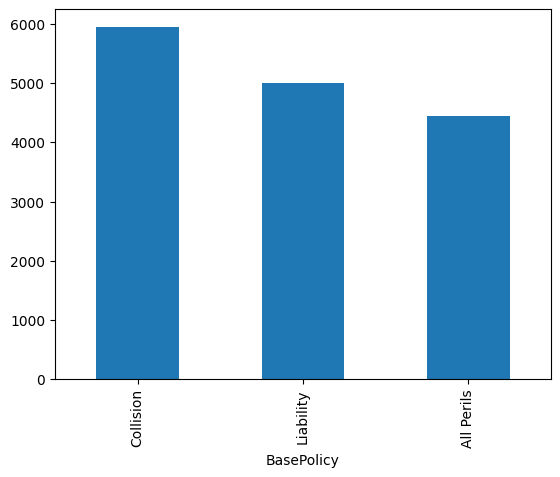

In [617]:
new_df["BasePolicy"].value_counts().plot(kind='bar')

In [618]:
new_df["BasePolicy"].mode()

0    Collision
Name: BasePolicy, dtype: object

In [619]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [620]:
from sklearn.impute import SimpleImputer

In [621]:
imputer=SimpleImputer(strategy="most_frequent")

In [622]:
x_train=imputer.fit_transform(x_train)
x_test=imputer.fit_transform(x_test)

In [623]:
imputer.statistics_

array([   2., 1994.,    2.,   27.,    5.,  400.])

In [624]:
new_df.isnull().sum()

WeekOfMonth        45
Make                0
BasePolicy         36
Year               45
DriverRating       35
VehicleCategory     0
AgeOfVehicle        0
FraudFound_P        0
PolicyType          0
Deductible         55
Fault               0
Age                55
AccidentArea        0
RepNumber           0
dtype: int64

**Standardization process**

In [625]:
x=n1.drop(columns="FraudFound_P")
y=n1["FraudFound_P"]

In [626]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [627]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(x_train)

# transform train and test sets
X_train_scaled = scaler.transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [628]:
x_train

,WeekOfMonth,Year,DriverRating,Age,RepNumber,Deductible
7868,5.0,1995.0,4.0,28.0,4,400.0
6635,4.0,1995.0,4.0,22.0,5,400.0
10222,3.0,1995.0,1.0,63.0,12,400.0
2731,2.0,1994.0,3.0,33.0,9,400.0
8734,3.0,1995.0,2.0,31.0,6,400.0
...,...,...,...,...,...,...
11798,5.0,1996.0,4.0,44.0,4,400.0
13896,2.0,1996.0,1.0,44.0,5,400.0
6637,4.0,1995.0,2.0,57.0,8,400.0
2575,3.0,1994.0,4.0,29.0,1,400.0


In [629]:
X_train_scaled

array([[ 1.71271058,  0.16890515,  1.34659335, -0.87644647, -0.97837095,
        -0.17488688],
       [ 0.9365814 ,  0.16890515,  1.34659335, -1.32217278, -0.761229  ,
        -0.17488688],
       [ 0.16045221,  0.16890515, -1.32949191,  1.72362369,  0.75876467,
        -0.17488688],
       ...,
       [ 0.9365814 ,  0.16890515, -0.43746349,  1.27789737, -0.10980314,
        -0.17488688],
       [ 0.16045221, -1.07801227,  1.34659335, -0.80215875, -1.62979681,
        -0.17488688],
       [ 0.16045221,  0.16890515,  0.45456493,  0.16358159,  0.32448077,
        -0.17488688]])

In [630]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=x_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=x_test.columns)

In [631]:
np.round(X_train_scaled.describe(),1)

,WeekOfMonth,Year,DriverRating,Age,RepNumber,Deductible
count,12296.0,12299.0,12310.0,12297.0,12336.0,12297.0
mean,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0
min,-1.4,-1.1,-1.3,-3.0,-1.6,-2.5
25%,-0.6,-1.1,-1.3,-0.7,-0.8,-0.2
50%,0.2,0.2,-0.4,-0.1,0.1,-0.2
75%,0.9,1.4,0.5,0.6,0.8,-0.2
max,1.7,1.4,1.3,3.0,1.6,6.7


In [632]:
np.round(x_train.describe(),1)

,WeekOfMonth,Year,DriverRating,Age,RepNumber,Deductible
count,12296.0,12299.0,12310.0,12297.0,12336.0,12297.0
mean,2.8,1994.9,2.5,39.8,8.5,407.7
std,1.3,0.8,1.1,13.5,4.6,43.9
min,1.0,1994.0,1.0,0.0,1.0,300.0
25%,2.0,1994.0,1.0,30.0,5.0,400.0
50%,3.0,1995.0,2.0,38.0,9.0,400.0
75%,4.0,1996.0,3.0,48.0,12.0,400.0
max,5.0,1996.0,4.0,80.0,16.0,700.0


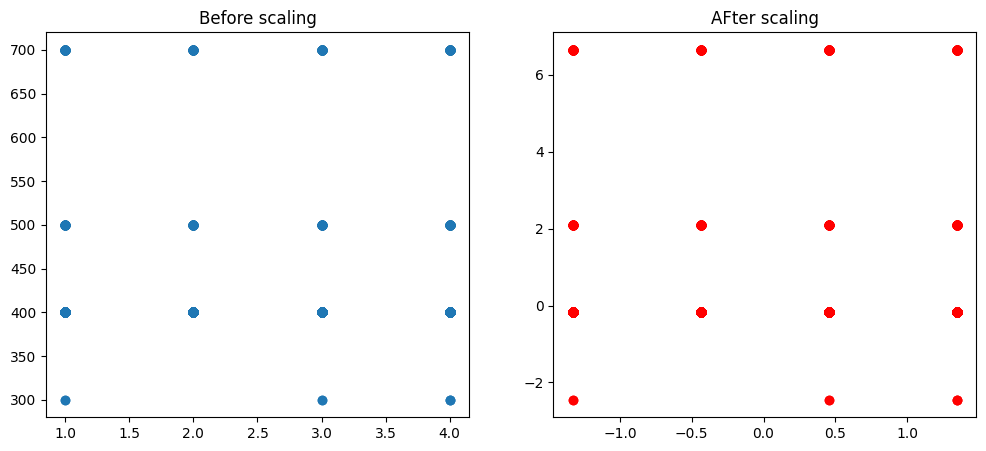

In [633]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title("Before scaling")
ax1.scatter("DriverRating","Deductible",marker="o",data=x_train)
ax2.set_title("AFter scaling")
ax2.scatter("DriverRating","Deductible",marker="o",data=X_train_scaled,color="red")

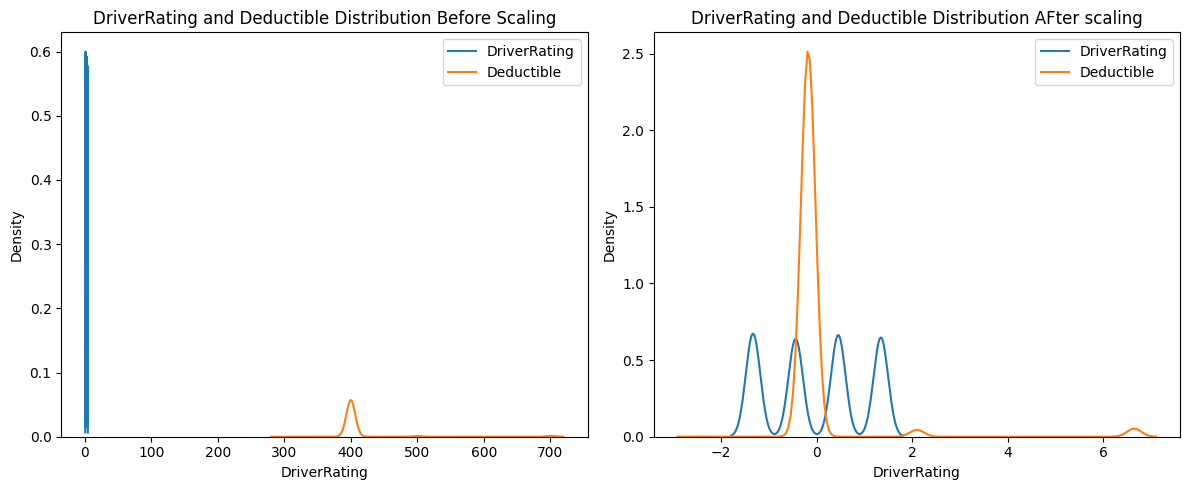

In [634]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title('DriverRating and Deductible Distribution Before Scaling')
sns.kdeplot(x_train["DriverRating"],ax=ax1,label="DriverRating")
sns.kdeplot(x_train["Deductible"],ax=ax1,label="Deductible")
ax1.legend()
ax2.set_title("DriverRating and Deductible Distribution AFter scaling")
sns.kdeplot(X_train_scaled["DriverRating"],ax=ax2,label="DriverRating")
sns.kdeplot(X_train_scaled["Deductible"],ax=ax2,label="Deductible")
ax2.legend()
fig.tight_layout()

In [635]:
#Now we will apply normalization on the standardized data  Mix Max Normalization scales the data to a fixed range, usually [0, 1].
from sklearn.preprocessing import MinMaxScaler


In [636]:
scaler2=MinMaxScaler()
scaler2.fit(x_train)
x_train_sc1=scaler2.transform(x_train)
x_test_sc1=scaler2.transform(x_test)

In [637]:
x_train_sc1=pd.DataFrame(x_train_sc1,columns=x_train.columns)
x_test_sc1=pd.DataFrame(x_test_sc1,columns=x_test.columns)

In [638]:
np.round(x_train.describe(),1)

,WeekOfMonth,Year,DriverRating,Age,RepNumber,Deductible
count,12296.0,12299.0,12310.0,12297.0,12336.0,12297.0
mean,2.8,1994.9,2.5,39.8,8.5,407.7
std,1.3,0.8,1.1,13.5,4.6,43.9
min,1.0,1994.0,1.0,0.0,1.0,300.0
25%,2.0,1994.0,1.0,30.0,5.0,400.0
50%,3.0,1995.0,2.0,38.0,9.0,400.0
75%,4.0,1996.0,3.0,48.0,12.0,400.0
max,5.0,1996.0,4.0,80.0,16.0,700.0


In [639]:
np.round(x_train_sc1.describe(),1)

,WeekOfMonth,Year,DriverRating,Age,RepNumber,Deductible
count,12296.0,12299.0,12310.0,12297.0,12336.0,12297.0
mean,0.4,0.4,0.5,0.5,0.5,0.3
std,0.3,0.4,0.4,0.2,0.3,0.1
min,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.2,0.0,0.0,0.4,0.3,0.2
50%,0.5,0.5,0.3,0.5,0.5,0.2
75%,0.8,1.0,0.7,0.6,0.7,0.2
max,1.0,1.0,1.0,1.0,1.0,1.0


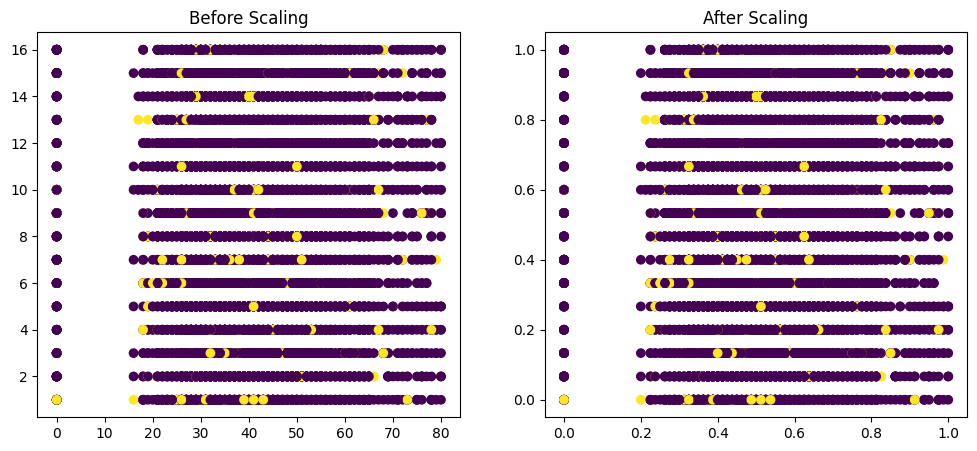

In [640]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(x_train['Age'], x_train['RepNumber'],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(x_train_sc1['Age'], x_train_sc1['RepNumber'],c=y_train)
ax2.set_title("After Scaling")
plt.show()

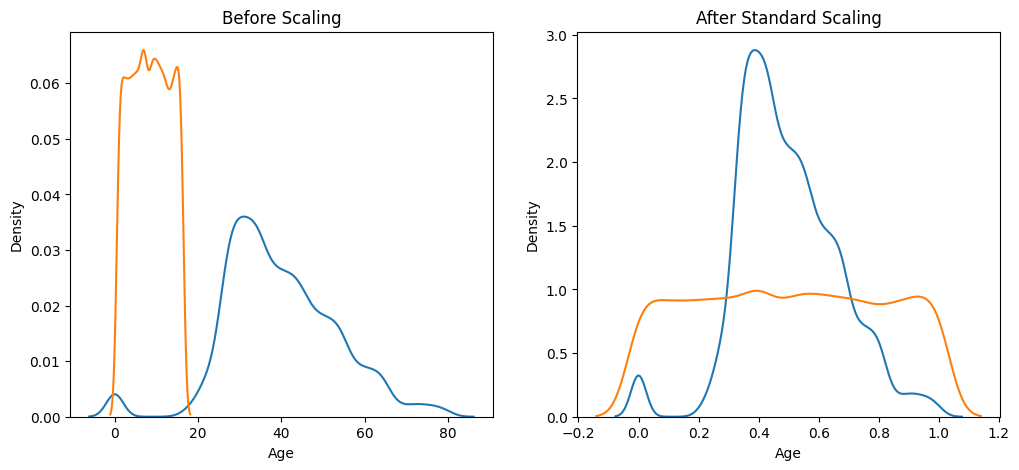

In [641]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['Age'], ax=ax1)
sns.kdeplot(x_train['RepNumber'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(x_train_sc1['Age'], ax=ax2)
sns.kdeplot(x_train_sc1['RepNumber'], ax=ax2)
plt.show()

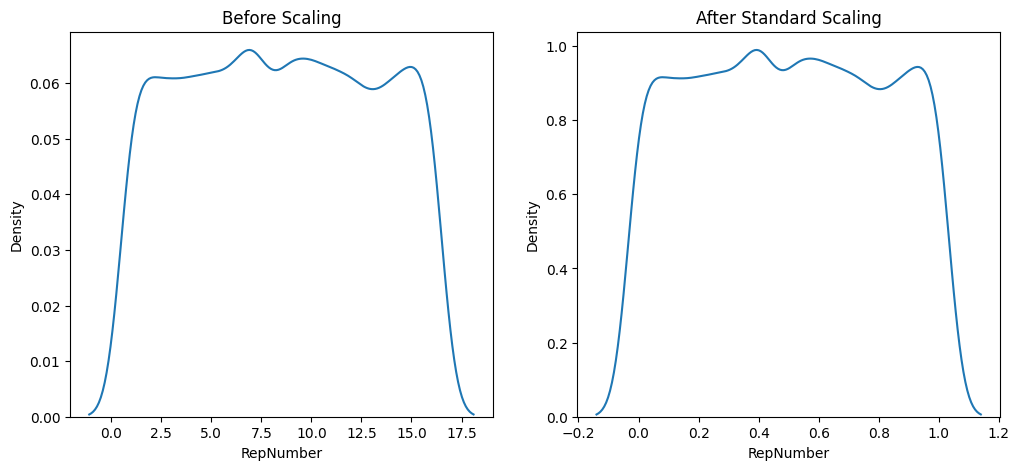

In [642]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['RepNumber'], ax=ax1)


# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(x_train_sc1['RepNumber'], ax=ax2)
#sns.kdeplot(x_train_scaled['Malic acid'], ax=ax2)
plt.show()

**Analysis**
1.Univariate Analysis
**Univariate analysis of AgeOfVehicle,BasePolicy,Make cols**

<Axes: xlabel='AgeOfVehicle'>

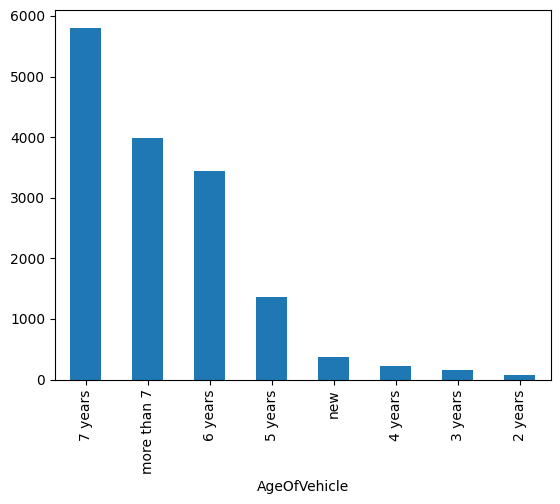

In [643]:
new_df["AgeOfVehicle"].value_counts().plot(kind="bar")

<Axes: ylabel='count'>

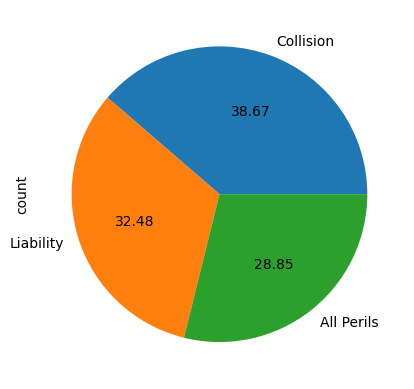

In [644]:
#categorical univariate analysis
new_df["BasePolicy"].value_counts().plot(kind="pie",autopct='%.2f')

<Axes: xlabel='Make'>

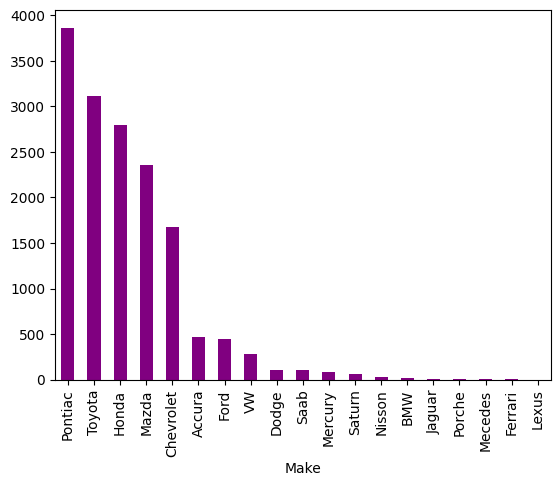

In [645]:
new_df["Make"].value_counts().plot(kind="bar",color="purple",label="Make Col")

<Axes: ylabel='Frequency'>

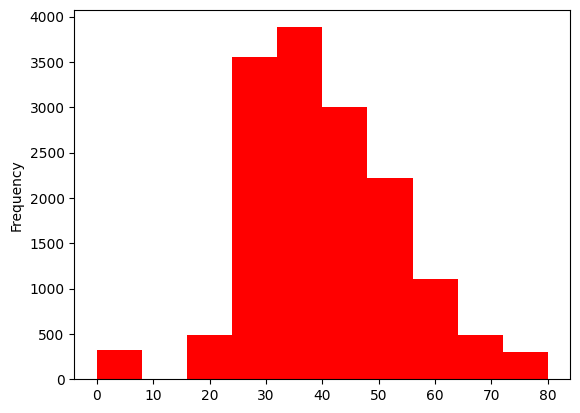

In [646]:
new_df["Age"].plot(kind="hist",color="red")

**Bivariate analysis**

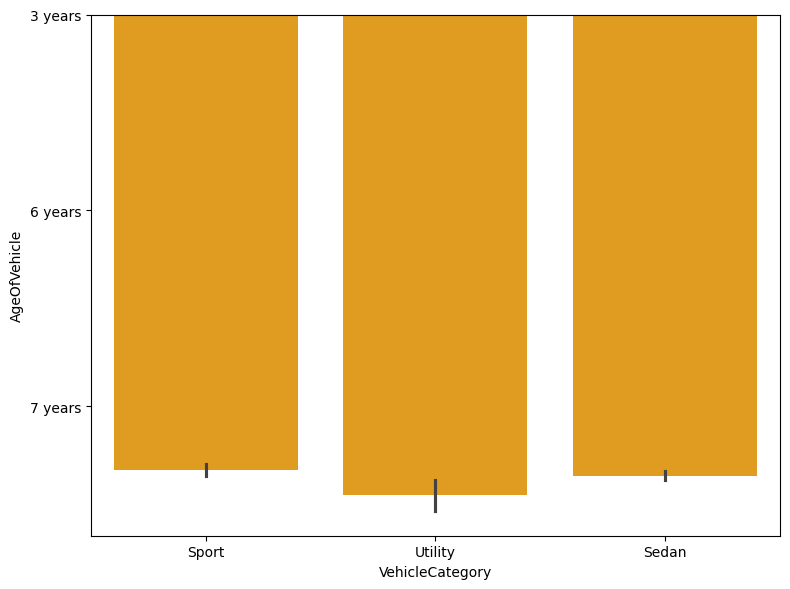

In [647]:
#Bivariate analysis
plt.figure(figsize=(8, 6))
sns.barplot(x=new_df["VehicleCategory"],y=new_df["AgeOfVehicle"],color="orange") #categorical-categorical analysis
plt.tight_layout()

In [648]:
m=new_df.dtypes
m

WeekOfMonth         float64
Make               category
BasePolicy           object
Year                float64
DriverRating        float64
VehicleCategory      object
AgeOfVehicle         object
FraudFound_P          int64
PolicyType           object
Deductible          float64
Fault              category
Age                 float64
AccidentArea         object
RepNumber             int64
dtype: object

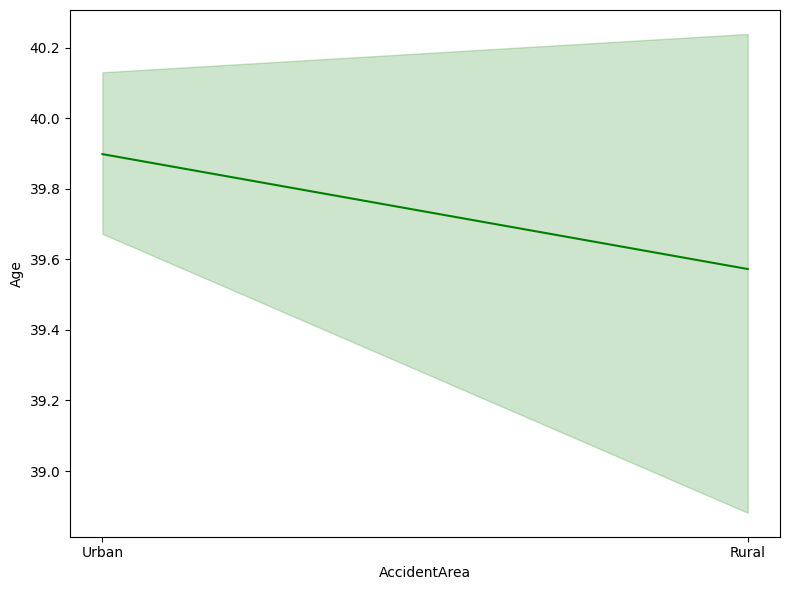

In [649]:
plt.figure(figsize=(8, 6))
sns.lineplot(x=new_df["AccidentArea"],y=new_df["Age"],color="green") #numerical-categorical data
plt.tight_layout()

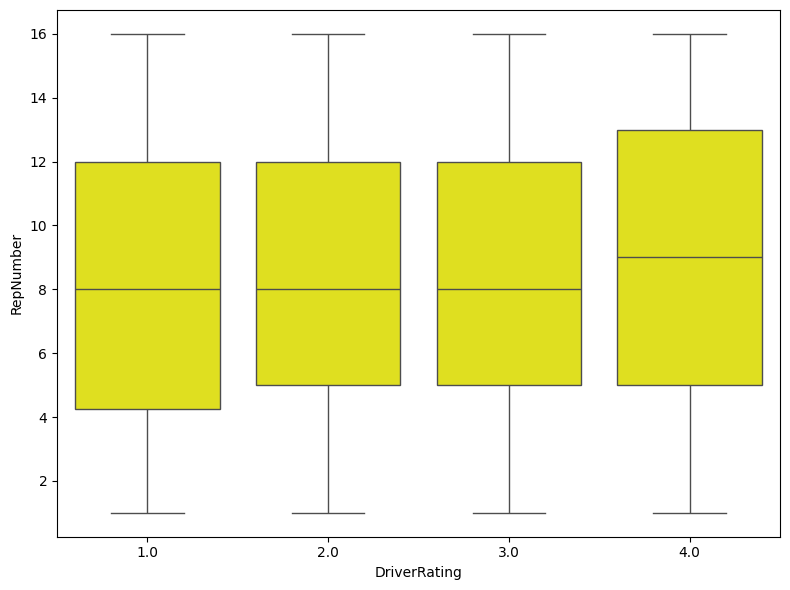

In [650]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=new_df["DriverRating"],y=new_df["RepNumber"],color="yellow") #numerical-categorical data
plt.tight_layout()

**3.Multivariate Analysis**

<Axes: xlabel='DriverRating', ylabel='BasePolicy'>

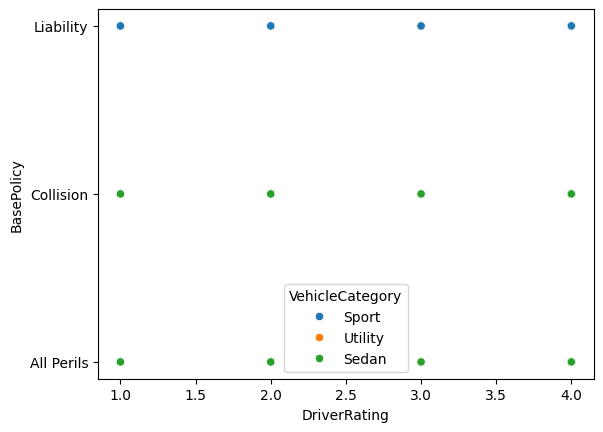

In [651]:
#Multivariate analysis based on driverRating,basePolicy, according to vehiclecategory,numerical-categorical-categorical
sns.scatterplot(data=new_df,x="DriverRating",y="BasePolicy",hue="VehicleCategory")

<Axes: >

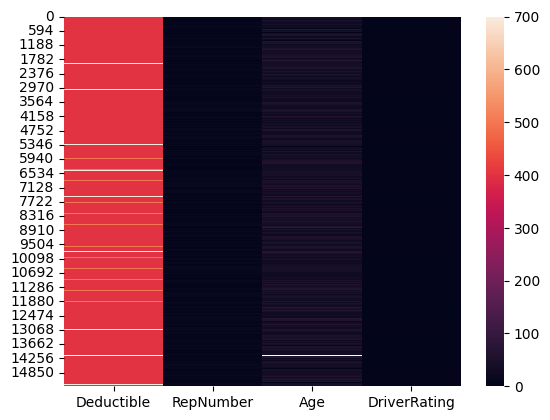

In [652]:
n2=new_df[["Deductible","RepNumber","Age","DriverRating"]]
sns.heatmap(n2)
#multivariate analysis with numerical cols

**Applications of Exploratory Data Analysis**
- EDA is used in clinical trials in healthcare and medicine to analyze and comprehend patient data, spot anomalies, and evaluate the efficacy of novel therapies.
Epidemiology: To find patterns and trends in disease outbreaks and public health hazards, EDA is helpful in the analysis of public health data.

- Manufacturing and Production: Quality Control: To enhance product quality, EDA assists in finding flaws, irregularities, and trends in manufacturing processes.
Production Optimization: To find bottlenecks, increase productivity, and cut expenses, EDA is used to analyze production data.

- Climate and weather analysis (EDA) is a branch of environmental science that is used to evaluate climate data, spot trends, and comprehend how environmental influences affect ecosystems.

- Finance and Economics: Portfolio Management: To make well-informed judgments, EDA is used to examine past stock prices, returns, and market trends.

In [653]:
#model training
from sklearn.linear_model import LinearRegression

In [654]:
new_df.sample(3)

,WeekOfMonth,Make,BasePolicy,Year,DriverRating,VehicleCategory,AgeOfVehicle,FraudFound_P,PolicyType,Deductible,Fault,Age,AccidentArea,RepNumber
1224,1.0,Mazda,Collision,1994.0,3.0,Sport,6 years,0,Sport - Collision,500.0,Policy Holder,37.0,Urban,12
10926,3.0,Pontiac,Collision,1995.0,2.0,Sedan,7 years,0,Sedan - Collision,400.0,Third Party,37.0,Urban,11
11918,1.0,Ford,All Perils,1996.0,4.0,Sedan,7 years,1,Sedan - All Perils,400.0,Policy Holder,58.0,Urban,1


In [664]:
X1=new_df[["WeekOfMonth","Year","Age"]]
Y1=new_df[["DriverRating"]]

In [665]:
new_df["WeekOfMonth"]=new_df["WeekOfMonth"].fillna(new_df["WeekOfMonth"].mean())

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15560\960702243.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["WeekOfMonth"]=new_df["WeekOfMonth"].fillna(new_df["WeekOfMonth"].mean())


In [666]:
new_df["Age"]=new_df["Age"].fillna(new_df["Age"].mean())

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15560\3371879380.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Age"]=new_df["Age"].fillna(new_df["Age"].mean())


In [667]:
new_df["Year"]=new_df["Year"].fillna(new_df["Year"].median())

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15560\1127986683.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Year"]=new_df["Year"].fillna(new_df["Year"].median())


In [668]:
new_df["DriverRating"]=new_df["DriverRating"].fillna(new_df["DriverRating"].mean())

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15560\1799674603.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["DriverRating"]=new_df["DriverRating"].fillna(new_df["DriverRating"].mean())


In [669]:
X_train,X_test,y_train,y_test = train_test_split(X1,Y1,test_size=0.2,random_state=2)

In [670]:
lr = LinearRegression()

In [671]:
lr.fit(X_train,y_train)

LinearRegression()

In [672]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
y_test.values

array([[4.],
       [1.],
       [4.],
       ...,
       [1.],
       [1.],
       [3.]])

In [ ]:
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 0.9922386059693643


In [ ]:
print("MSE",mean_squared_error(y_test,y_pred))

MSE 1.2359899633905882


In [ ]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 1.1117508549088633
